customerRegressionFull.csv 는 다음과 같은 데이터를 포함하고 있다.

 

- age: 고객의 나이

- Computer: 가입 후 3개월간 컴퓨터 관련 제품 구매 회수

- TV: 가입 후 3개월간 TV 관련 제품 구매 회수

- Cellphone: 가입 후 3개월간 스마트폰 관련 제품 구매 회수

- Software: 가입 후 3개월간 소프트웨어 관련 제품 구매 회수

- Monetary3: 가입 후 3개월동안 총 구매금액

- Monetary60: 가입 후 60개월동안 총 구매금액

 

Monetary60 을 예측하고자 한다. Monetary60이 종속변수이고, 나머지 변수들은 독립변수 후보들이다. 탐색 및 다양한 방안을 통해 변수간의 관계를 파악하고, 회귀분석 모형을 학습한 후 모형의 성과를 측정하라. (Jupyter Notebook 파일로 제출하세요.)



## 데이터 불러오기

In [68]:
import pandas as pd

custom = pd.read_csv('data/customerRegressionFull.csv')
custom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13000 entries, 0 to 12999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         13000 non-null  int64  
 1   Computer    13000 non-null  int64  
 2   TV          13000 non-null  int64  
 3   Cellphone   13000 non-null  int64  
 4   Software    13000 non-null  int64  
 5   Frequency3  13000 non-null  int64  
 6   Monetary3   13000 non-null  float64
 7   Monetary60  13000 non-null  float64
dtypes: float64(2), int64(6)
memory usage: 812.6 KB


In [69]:
custom

,age,Computer,TV,Cellphone,Software,Frequency3,Monetary3,Monetary60
0,37,4,1,0,2,7,1.607621e+06,3.220018e+06
1,21,4,1,1,1,7,1.654844e+06,4.792484e+06
2,20,1,2,2,1,6,1.884846e+06,4.681646e+06
3,11,0,3,0,2,5,1.415478e+06,5.861252e+06
4,17,0,2,1,0,3,1.669848e+06,3.914121e+06
...,...,...,...,...,...,...,...,...
12995,33,4,0,0,3,7,1.371567e+06,3.419460e+06
12996,21,3,3,1,7,14,2.168963e+06,1.560902e+06
12997,20,6,0,1,5,12,1.727812e+06,6.001207e+06
12998,27,5,2,1,6,14,2.795228e+06,8.306028e+06


In [38]:
# train : test = 7 : 3
custom_train = custom.iloc[:9100]
custom_test = custom.iloc[9100:]

## 시각화 및 상관관계 계수 활용

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C6522739C8>,
      dtype=object)

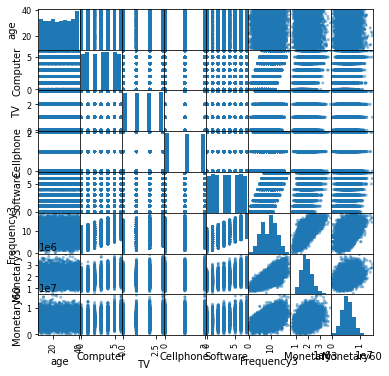

In [4]:
from pandas.plotting import scatter_matrix

scatter_matrix(custom_train, figsize=(6,6))

In [39]:
custom_train.corr(method='pearson')

,age,Computer,TV,Cellphone,Software,Frequency3,Monetary3,Monetary60
age,1.000000,-0.001052,-0.003238,0.009303,0.001331,0.001482,0.006117,0.013316
Computer,-0.001052,1.000000,-0.013761,0.001833,-0.001256,0.591545,0.424226,0.294160
TV,-0.003238,-0.013761,1.000000,-0.000837,-0.006164,0.324129,0.232489,0.142575
Cellphone,0.009303,0.001833,-0.000837,1.000000,0.029428,0.266939,0.206413,0.124040
Software,0.001331,-0.001256,-0.006164,0.029428,1.000000,0.689433,0.499916,0.342308
Frequency3,0.001482,0.591545,0.324129,0.266939,0.689433,1.000000,0.724607,0.488505
Monetary3,0.006117,0.424226,0.232489,0.206413,0.499916,0.724607,1.000000,0.348489
Monetary60,0.013316,0.294160,0.142575,0.124040,0.342308,0.488505,0.348489,1.000000


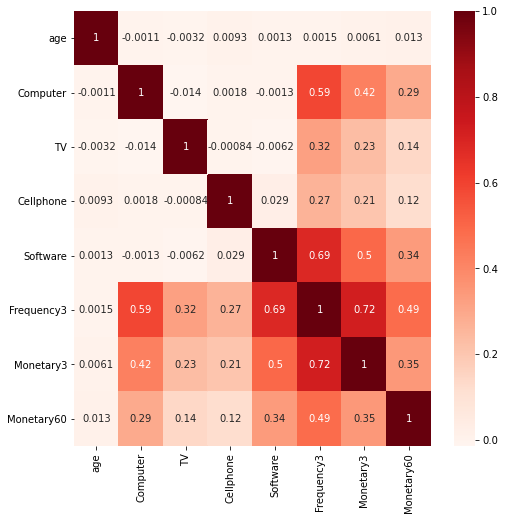

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
cor = custom_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

## 다중 공선성 확인

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(inputs):

    vif = pd.DataFrame()
    vif["variables"] = inputs.columns
    vif["VIF"] = [variance_inflation_factor(inputs.values, i) for i in range(inputs.shape[1])]

    return vif

print(calc_vif(custom))

# Computer + TV + Cellphone + Software = Frequency3
# 상관관계가 매우 크기 때문에 vif가 크게 나와서 inf(오버플로우)가 나온다

    variables        VIF
0         age   6.538816
1    Computer        inf
2          TV        inf
3   Cellphone        inf
4    Software        inf
5  Frequency3        inf
6   Monetary3  25.514550
7  Monetary60  10.524712


C:\Users\eunbi\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [42]:
calc_vif(custom.drop(['Monetary60'], axis=1))

C:\Users\eunbi\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,age,6.273384
1,Computer,inf
2,TV,inf
3,Cellphone,inf
4,Software,inf
5,Frequency3,inf
6,Monetary3,24.175428


## 독립변수 제거 방안 - 후진 제거법

In [43]:
custom_train.head()

,age,Computer,TV,Cellphone,Software,Frequency3,Monetary3,Monetary60
0,37,4,1,0,2,7,1.607621e+06,3.220018e+06
1,21,4,1,1,1,7,1.654844e+06,4.792484e+06
2,20,1,2,2,1,6,1.884846e+06,4.681646e+06
3,11,0,3,0,2,5,1.415478e+06,5.861252e+06
4,17,0,2,1,0,3,1.669848e+06,3.914121e+06


In [44]:
import statsmodels.api as sm

x = custom[['age', 'Computer', 'TV', 'Cellphone', 'Software', 'Frequency3', 'Monetary3']]
y = custom['Monetary60']
X = sm.add_constant(x)

model = sm.OLS(y,X).fit()
model.pvalues

const         1.029351e-304
age            5.986434e-01
Computer       5.591647e-21
TV             1.349628e-02
Cellphone      4.367822e-06
Software       3.133203e-17
Frequency3    9.422394e-283
Monetary3      3.766259e-01
dtype: float64

In [45]:
X = X.drop(['age'],axis=1)
model = sm.OLS(y,X).fit()
model.pvalues

const          0.000000e+00
Computer       5.522017e-21
TV             1.367830e-02
Cellphone      4.237460e-06
Software       3.255625e-17
Frequency3    8.939045e-283
Monetary3      3.796395e-01
dtype: float64

In [46]:
X = X.drop(['TV'],axis=1)
model = sm.OLS(y,X).fit()
model.pvalues

const         0.000000e+00
Computer      4.330879e-03
Cellphone     7.049326e-02
Software      2.974251e-02
Frequency3    9.510918e-74
Monetary3     3.796395e-01
dtype: float64

In [47]:
X = X.drop(['Cellphone'],axis=1)
model = sm.OLS(y,X).fit()
model.pvalues

const          0.000000e+00
Computer       2.501199e-02
Software       1.505804e-01
Frequency3    3.021467e-116
Monetary3      3.967290e-01
dtype: float64

In [79]:
X = X.drop(['Computer'],axis=1)
model = sm.OLS(y,X).fit()
model.pvalues

const         1.213777e-295
Software       4.048353e-01
Frequency3    7.828554e-199
Monetary3      3.840496e-01
dtype: float64

## 학습

In [12]:
import statsmodels.api as sm
import math

x = custom_train[['Software', 'Frequency3', 'Monetary3']]
y = custom_train['Monetary60']
X = sm.add_constant(x)

model = sm.OLS(y,X).fit()
predictions = model.predict(X)

x_test = custom_train[['Software', 'Frequency3', 'Monetary3']]
y_test = custom_train['Monetary60']
X_test = sm.add_constant(x_test)

test_prediction = model.predict(X_test)

mae = sum( abs(test_prediction - y_test) / len(test_prediction) )
rmse = math.sqrt( sum((test_prediction - y_test)**2) / len(test_prediction) )
mape = ( (abs(test_prediction - y_test)/y_test)*100 ).mean()

print('MAE : ', mae)
print('RMSE : ', rmse)
print('MAPE : ', mape)

MAE :  1406814.2588784953
RMSE :  1780148.7753031473
MAPE :  38.710402943371506


In [13]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Monetary60   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     951.0
Date:                Tue, 15 Sep 2020   Prob (F-statistic):               0.00
Time:                        23:03:11   Log-Likelihood:            -1.4388e+05
No. Observations:                9100   AIC:                         2.878e+05
Df Residuals:                    9096   BIC:                         2.878e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.058e+06   8.02e+04     38.157      0.000     2.9e+06    3.22e+06
Software    9410.1426   1.13e+04      0.833      0.405   -1.27e+04    3.16e+04
Frequency3      3e+05   9724.311     30.849      0.000    2.81e+05    3.19e+05
Monetary3     -0.0512      0.059     -0.871      0.384      -0.166       0.064
==============================================================================
Omnibus:                        9.988   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               11.445
Skew:                          -0.006   Prob(JB):                      0.00327
Kurtosis:                       3.173   Cond. No.                     8.41e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 교차 검증

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

x = custom[['Software', 'Frequency3', 'Monetary3']]
y = custom['Monetary60']


lin_reg = LinearRegression()
scores = cross_val_score(lin_reg, x, y, cv=5, scoring='neg_mean_absolute_error')

scores.mean()

-1403400.047950149

## 모두 넣고 수행 해보기

In [80]:
custom_ind = custom.drop(['Monetary60'],axis=1)

scores_all = cross_val_score(lin_reg, custom_ind, custom['Monetary60'], cv=5, scoring='neg_mean_absolute_error')
scores_all.mean()

-1403723.3115801134